# Analysis of the read depth distributions of the bisulfite sequencing data from ICGC. The cancers analyzed are PBCA, BOCA, CLLE, and MALY. Coverage represents the number of times a sequenced DNA fragment (i.e., a read) maps to a genomic target. The deeper the coverage of a target region (i.e., the more times the region is sequenced), the greater the reliability and sensitivity of the sequencing assay. Typically, the minimum depth of coverage required for genomic resequencing of diploid organisms, such as human, mouse, or rat, is 20–30X. 

In [2]:
import pandas as pd
# pbca = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/meth_seq_PBCA_cds.tsv', sep='\t')
# # boca = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/meth_seq_BOCA_cds.tsv', sep='\t')
# clle = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/meth_seq_CLLE_cds.tsv', sep='\t')
maly = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/meth_seq_MALY_cds.tsv', sep='\t')

In [32]:
#make new column that contains total read count(methylated + unmethylated)
pbca_totalReads = []
clle_totalReads = []
boca_totalReads = []
maly_totalReads = []

for m, u in zip(pbca['methylated_reads'], pbca['unmethylated_reads']):
    pbca_totalReads.append(int(m + u))

for m, u in zip(clle['methylated_reads'], clle['unmethylated_reads']):
    clle_totalReads.append(int(m + u))
    
# for m, u in zip(boca['methylated_reads'], boca['unmethylated_reads']):
#     boca_totalReads.append(int(m + u))
    
for m, u in zip(maly['methylated_reads'], maly['unmethylated_reads']):
    maly_totalReads.append(int(m + u))

In [33]:
pbca['total_reads'] = pbca_totalReads
clle['total_reads'] = clle_totalReads
# boca['total_reads'] = boca_totalReads
maly['total_reads'] = maly_totalReads

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116020d68>]], dtype=object)

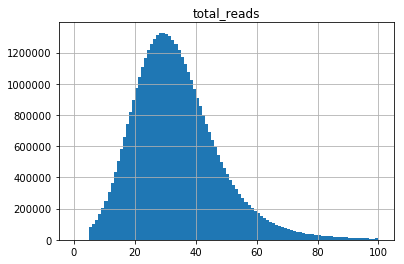

In [4]:
%matplotlib inline
pbca.hist(column ='total_reads', bins = 100, range=[0, 100])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11639fbe0>]], dtype=object)

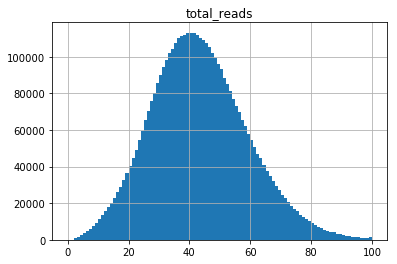

In [5]:
clle.hist(column = 'total_reads', bins = 100, range=[0, 100])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11693a780>]], dtype=object)

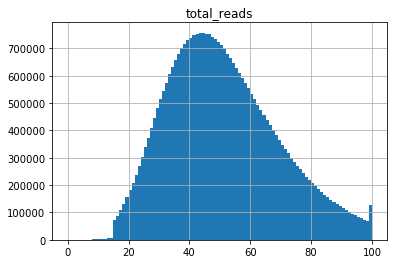

In [6]:
maly.hist(column = 'total_reads', bins = 100, range=[0, 100])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116cbc8d0>]], dtype=object)

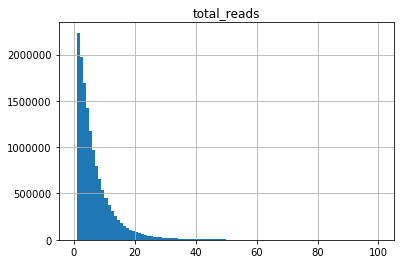

In [7]:
boca.hist(column = 'total_reads', bins = 100, range=[0, 100])

In [8]:
pbca_underTen = 0
clle_underTen = 0
maly_underTen = 0
for pb, cl, ma in zip(pbca['total_reads'], clle['total_reads'], maly['total_reads']):
    if pb < 10:
        pbca_underTen += 1
    if cl < 10:
        clle_underTen += 1
    if ma < 10:
        maly_underTen += 1
print (pbca_underTen)
print (clle_underTen)

198060
35703


In [9]:
#calculate mean mapped read depth(total # of reads / total of bases) for each cancer
pbca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41685994 entries, 0 to 41685993
Data columns (total 8 columns):
chromosome            object
start                 int64
stop                  int64
id                    object
methylation_ratio     float64
methylated_reads      float64
unmethylated_reads    float64
total_reads           int64
dtypes: float64(3), int64(3), object(2)
memory usage: 2.5+ GB


Is there any relationship between read depth at a site and methylation ratio?


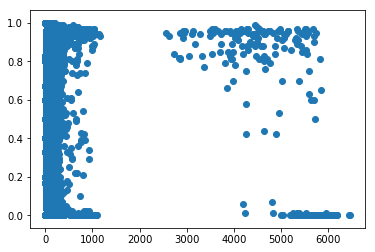

In [11]:
import matplotlib.pyplot as plt
plt.scatter(pbca.total_reads, pbca.methylation_ratio)

In [12]:
pbca.total_reads.max()

6457

In [13]:
pbca.total_reads.min()

5

In [14]:
clle.total_reads.max()

251

In [15]:
clle.total_reads.min()

2

In [16]:
maly.total_reads.max()

265

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1151032b0>]], dtype=object)

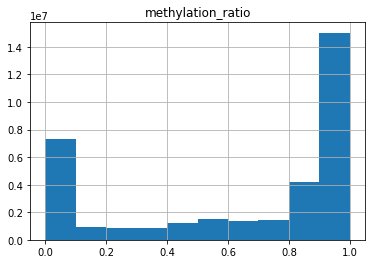

In [34]:
maly.hist('methylation_ratio')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ba5b2668>]], dtype=object)

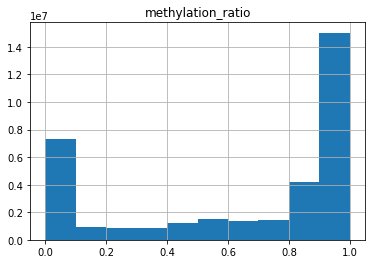

In [35]:
maly = maly[maly['total_reads'] > 10]
maly.hist('methylation_ratio')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1175b3898>]], dtype=object)

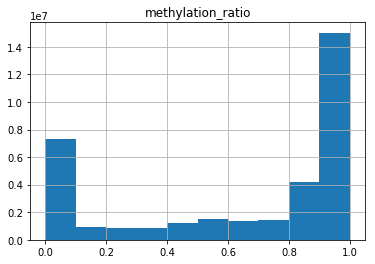

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114db05c0>]], dtype=object)

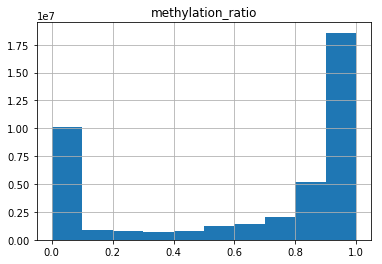

In [29]:
pbca.hist('methylation_ratio')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114df73c8>]], dtype=object)

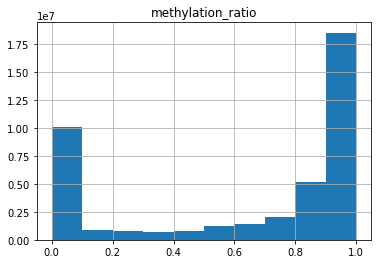

In [30]:
pbca = pbca[pbca['total_reads'] > 10]
pbca.hist('methylation_ratio')

In [39]:
s = 'RABL2B'
if not s.endswith(','):
    print ('works')

works
